<a href="https://colab.research.google.com/github/roshfrosh/Spotify-Analytics---Capstone/blob/main/CT6_Spotify_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")



In [ ]:
spotify_df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

#print(df.head())

In [ ]:
result = spotify_df.dtypes
#print (result)

**Pre-Cleaning EDA**

In [ ]:
summary_stats = spotify_df.describe(include='all')
summary_stats

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953,953,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953,953.000000,...,953.000000,858,953,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
unique,943,645,NaN,NaN,NaN,NaN,NaN,NaN,949,NaN,...,NaN,11,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Daylight,Taylor Swift,NaN,NaN,NaN,NaN,NaN,NaN,723894473,NaN,...,NaN,C#,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,34,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,...,NaN,120,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,NaN,67.812172,...,122.540399,NaN,NaN,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,NaN,NaN,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,NaN,86.441493,...,28.057802,NaN,NaN,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,NaN,NaN,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,NaN,0.000000,...,65.000000,NaN,NaN,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,NaN,NaN,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,NaN,13.000000,...,100.000000,NaN,NaN,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,NaN,NaN,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,NaN,34.000000,...,121.000000,NaN,NaN,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,NaN,NaN,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,NaN,88.000000,...,140.000000,NaN,NaN,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000


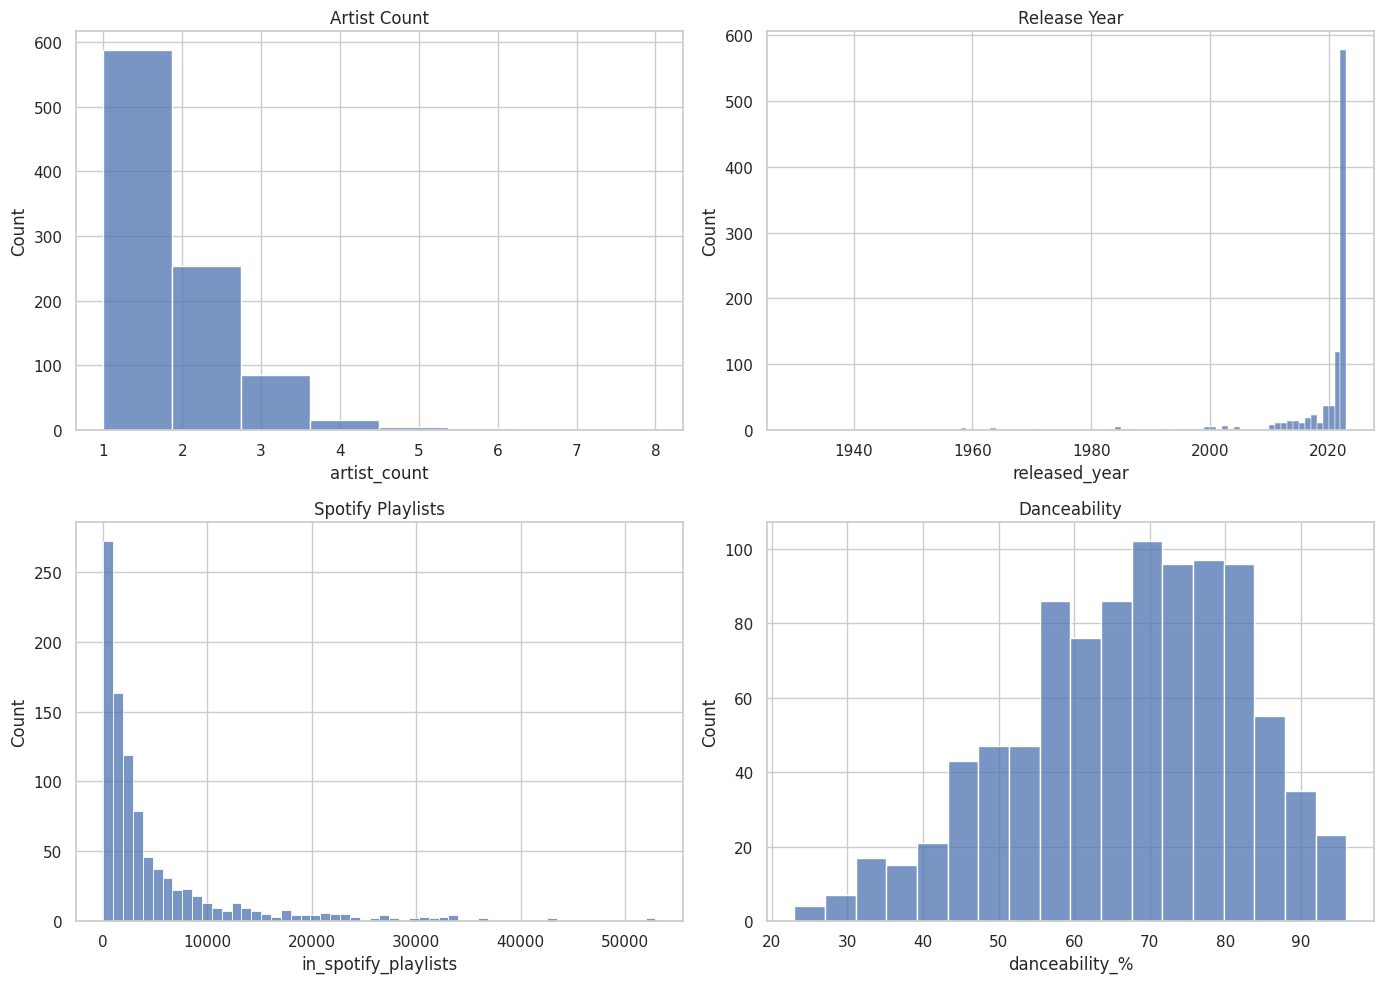

In [ ]:
#EDA Histograms

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Artist Count
sns.histplot(data=spotify_df, x='artist_count', bins=8, ax=axes[0, 0], kde=False)
axes[0, 0].set_title('Artist Count')

# Released Year'
sns.histplot(data=spotify_df, x='released_year', bins=(2023-1930), ax=axes[0, 1], kde=False)
axes[0, 1].set_title('Release Year')

# In Spotify Playlists
sns.histplot(data=spotify_df, x='in_spotify_playlists', ax=axes[1, 0], kde=False)
axes[1, 0].set_title('Spotify Playlists')

# Danceability
sns.histplot(data=spotify_df, x='danceability_%', ax=axes[1, 1], kde=False)
axes[1, 1].set_title('Danceability')

plt.tight_layout()
plt.show()

**Data Cleanup**

In [ ]:
#Missing Value check
missing_value_check = spotify_df.isnull().sum()
missing_value_check

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [ ]:
# Non - Quantitative Row Detection
def non_quantitative_rows(sptify_df, column):
    return spotify_df[pd.to_numeric(spotify_df[column], errors='coerce').isna()]

# Quantitative Column List
quantitative_column_list = [
    'artist_count', 'released_year', 'released_month', 'released_day',
    'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists',
    'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts',
    'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
    'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

# Non-Quantitative Rows
non_quantitative_data = {column: non_quantitative_rows(spotify_df, column) for column in quantitative_column_list}

num_non_quantitative_rows = {column: data.shape[0] for column, data in non_quantitative_data.items() if not data.empty}
num_non_quantitative_rows


{'streams': 1, 'in_deezer_playlists': 79, 'in_shazam_charts': 57}

In [ ]:
# Identifying Non Quantitative values in Quantitative Fields
non_quantitative_values = {
    column: data.head() for column, data in non_quantitative_data.items() if not data.empty
}

non_quantitative_values


{'streams':                               track_name     artist(s)_name  artist_count  \
 574  Love Grows (Where My Rosemary Goes)  Edison Lighthouse             1   
 
      released_year  released_month  released_day  in_spotify_playlists  \
 574           1970               1             1                  2877   
 
      in_spotify_charts                                            streams  \
 574                  0  BPM110KeyAModeMajorDanceability53Valence75Ener...   
 
      in_apple_playlists  ...  bpm key   mode danceability_%  valence_%  \
 574                  16  ...  110   A  Major             53         75   
 
     energy_% acousticness_%  instrumentalness_%  liveness_%  speechiness_%  
 574       69              7                   0          17              3  
 
 [1 rows x 24 columns],
 'in_deezer_playlists':          track_name         artist(s)_name  artist_count  released_year  \
 48          Starboy  The Weeknd, Daft Punk             2           2016   
 54     Anot

In [ ]:
#Cleaning Quantitative columns with non-quantitative values
cleaned_columns= spotify_df.drop(non_quantitative_data['streams'].index)

for column in ['in_deezer_playlists', 'in_shazam_charts']:
    cleaned_columns[column] = pd.to_numeric(cleaned_columns[column], errors='coerce')

#Dropping rows
cleaned_columns.dropna(subset=['in_deezer_playlists', 'in_shazam_charts'], inplace=True)

cleaned_columns = cleaned_columns.astype({
    'in_deezer_playlists': 'int',
    'in_shazam_charts': 'int'
})

cleaned_columns_summary = cleaned_columns.info()
cleaned_columns_summary




<class 'pandas.core.frame.DataFrame'>
Int64Index: 829 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            829 non-null    object
 1   artist(s)_name        829 non-null    object
 2   artist_count          829 non-null    int64 
 3   released_year         829 non-null    int64 
 4   released_month        829 non-null    int64 
 5   released_day          829 non-null    int64 
 6   in_spotify_playlists  829 non-null    int64 
 7   in_spotify_charts     829 non-null    int64 
 8   streams               829 non-null    object
 9   in_apple_playlists    829 non-null    int64 
 10  in_apple_charts       829 non-null    int64 
 11  in_deezer_playlists   829 non-null    int64 
 12  in_deezer_charts      829 non-null    int64 
 13  in_shazam_charts      829 non-null    int64 
 14  bpm                   829 non-null    int64 
 15  key                   748 non-null    ob

In [ ]:
#Obj to string values
cleaned_columns = cleaned_columns.astype({col: 'str' for col in cleaned_columns.select_dtypes(['object']).columns})
cleaned_columns.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts         int64
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [ ]:
# Creating one date field for time series
cleaned_columns['release_date'] = cleaned_columns['released_year'].astype(str) + '-' + \
                         cleaned_columns['released_month'].astype(str).str.zfill(2) + '-' + \
                         cleaned_columns['released_day'].astype(str).str.zfill(2)

cleaned_columns['release_date'] = pd.to_datetime(cleaned_columns['release_date'], errors='coerce', format='%Y-%m-%d')


# NaT check
NaT_check =cleaned_columns[cleaned_columns['release_date'].isna()]
NaT_check

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date


In [ ]:
# Ensure correct data types
spotify_df = cleaned_columns.astype({
    'released_year': 'int',
    'released_month': 'int',
    'released_day': 'int',
    'streams': 'int',
    'in_spotify_playlists': 'int',
    'in_spotify_charts': 'int',
    'in_apple_playlists': 'int',
    'in_apple_charts': 'int',
    'in_deezer_playlists': 'int',
    'in_deezer_charts': 'int',
    'in_shazam_charts': 'int',
    'bpm': 'int',
    'danceability_%': 'int',
    'valence_%': 'int',
    'energy_%': 'int',
    'acousticness_%': 'int',
    'instrumentalness_%': 'int',
    'liveness_%': 'int',
    'speechiness_%': 'int'
})

# Remove duplicates
spotify_df.drop_duplicates(inplace=True)


In [ ]:
#spotify_df.dtypes

In [ ]:
# Remove the rows with missing 'key' values
spotify_df = spotify_df.dropna(subset=['key'])

# Verify if the rows with missing values have been removed
print(spotify_df['key'].isnull().sum())

0


In [ ]:
spotify_df.shape

(829, 25)

In [ ]:
duplicate_rows = spotify_df[spotify_df[['track_name','artist(s)_name']].duplicated()]
duplicate_rows

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854,1,...,C#,Major,70,57,57,9,20,11,7,2022-10-31
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334,174,...,G#,Major,75,53,74,2,0,11,5,2021-08-06
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,...,A#,Minor,84,72,74,10,0,34,7,2022-04-14
873,SNAP,Rosa Linn,1,2022,3,19,1818,0,711366595,3,...,nan,Major,56,52,64,11,0,45,7,2022-03-19


In [ ]:
spotify_df = spotify_df.drop(duplicate_rows.index.tolist())
spotify_df.reset_index(drop=True, inplace=True) #reset index
#spotify_df

In [ ]:
spotify_df.shape

(825, 25)

In [ ]:
#Renaming Columns for easier names
renamed_columns = {col: col.replace('%', 'percent') for col in spotify_df.columns if '%' in col}
spotify_df = spotify_df.rename(columns=renamed_columns)
spotify_df.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_percent,valence_percent,energy_percent,acousticness_percent,instrumentalness_percent,liveness_percent,speechiness_percent,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,2023-05-18


**Post Cleanng EDA**

In [ ]:
# Summary statistics
summary_stats = spotify_df.describe()
summary_stats

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_percent,valence_percent,energy_percent,acousticness_percent,instrumentalness_percent,liveness_percent,speechiness_percent
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,8.250000e+02,825.00000,825.000000,825.000000,825.000000,825.00000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,1.584242,2019.358788,6.153939,14.089697,3109.709091,10.872727,3.730241e+08,49.41697,47.233939,96.369697,2.327273,48.45697,122.870303,67.376970,51.339394,64.223030,27.164848,1.637576,18.296970,10.449697
std,0.906018,10.353919,3.515474,9.006966,3772.776898,17.869594,3.703965e+08,58.11796,48.095852,161.380514,5.285724,122.21038,27.944751,14.520398,23.494499,16.440056,25.600781,8.694982,13.900314,10.188286
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.00000,0.000000,0.000000,0.000000,0.00000,65.000000,23.000000,4.000000,14.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2021.000000,3.000000,6.000000,801.000000,0.000000,1.293147e+08,11.00000,6.000000,12.000000,0.000000,0.00000,100.000000,58.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,1783.000000,2.000000,2.448919e+08,27.00000,30.000000,32.000000,0.000000,2.00000,121.000000,70.000000,51.000000,65.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,3818.000000,15.000000,4.805070e+08,68.00000,80.000000,99.000000,1.000000,33.00000,141.000000,78.000000,70.000000,77.000000,43.000000,0.000000,23.000000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,29499.000000,147.000000,2.808097e+09,492.00000,275.000000,974.000000,45.000000,953.00000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [ ]:
# Unique Val
unique_val = spotify_df.nunique()
unique_val



track_name                  822
artist(s)_name              574
artist_count                  8
released_year                40
released_month               12
released_day                 31
in_spotify_playlists        752
in_spotify_charts            72
streams                     822
in_apple_playlists          181
in_apple_charts             155
in_deezer_playlists         244
in_deezer_charts             31
in_shazam_charts            178
bpm                         122
key                          12
mode                          2
danceability_percent         71
valence_percent              93
energy_percent               79
acousticness_percent         96
instrumentalness_percent     36
liveness_percent             67
speechiness_percent          48
release_date                409
dtype: int64

In [ ]:
# Top 5 String/Categorical Data
top_5_data = spotify_df.select_dtypes(include=['object']).describe().loc['top']
top_5_data

track_name        Let It Snow! Let It Snow! Let It Snow!
artist(s)_name                              Taylor Swift
key                                                   C#
mode                                               Major
Name: top, dtype: object

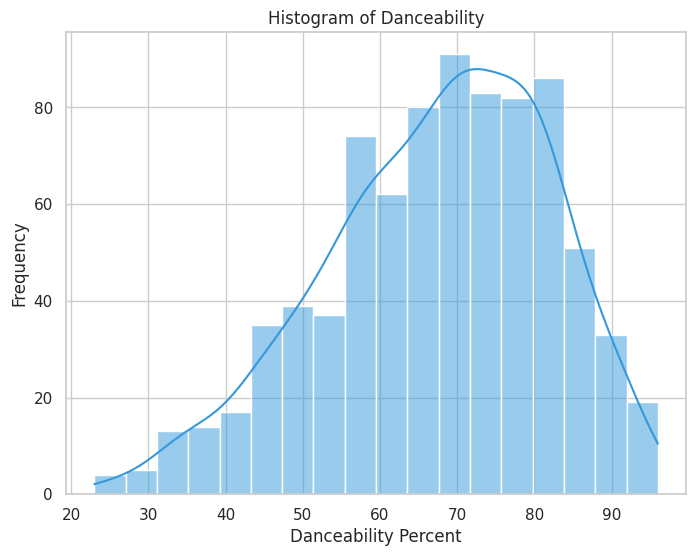

In [ ]:
# Danceability Histogram
plt.figure(figsize=(8, 6))
sns.histplot(spotify_df['danceability_percent'], color="#3498db", kde=True)
plt.title('Histogram of Danceability')
plt.xlabel('Danceability Percent')
plt.ylabel('Frequency')
plt.show()


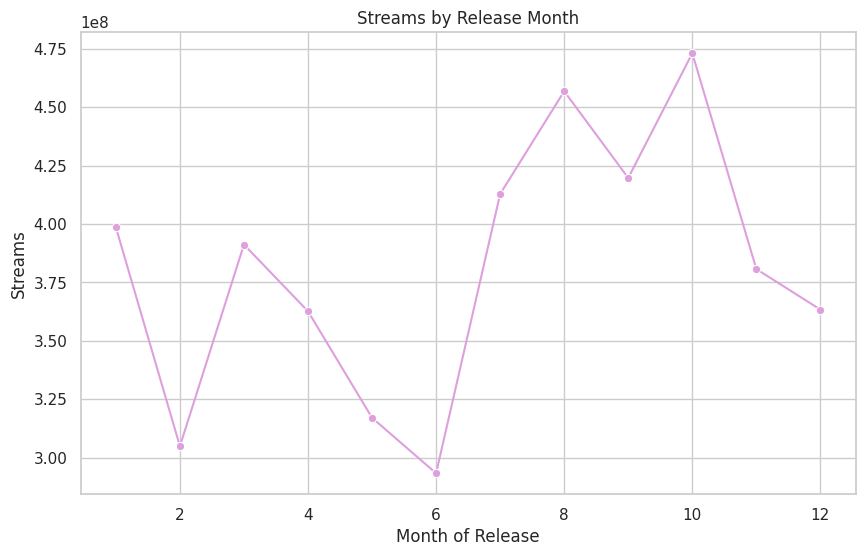

In [ ]:
#Streams by release months
streams_by_month = spotify_df.groupby('released_month')['streams'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=streams_by_month, x='released_month', y='streams', color="plum", marker="o")
plt.title('Streams by Release Month')
plt.xlabel('Month of Release')
plt.ylabel('Streams')
plt.show()



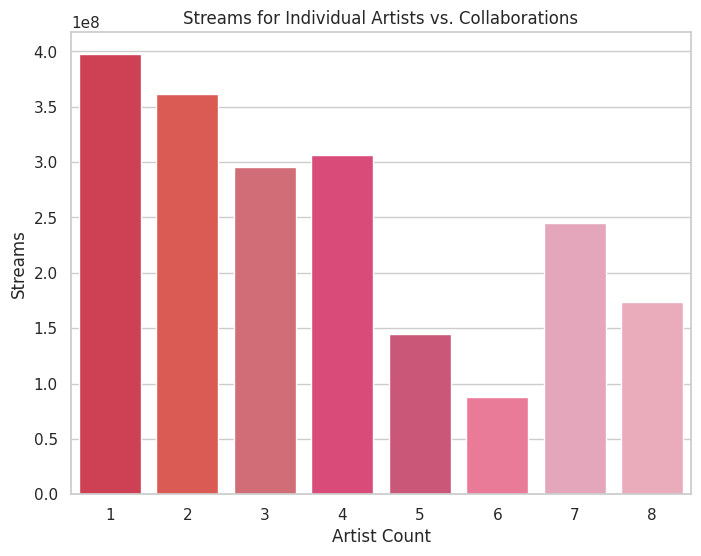

In [ ]:
# Streams for individual artists vs collaborations
individual_vs_collab = spotify_df.groupby('artist_count')['streams'].mean().reset_index()

plt.figure(figsize=(8, 6))
palette=['#e52942', '#f0473e', '#e15c6a','#f13471','#dd4470','#fc678f','#ed9cb6','#f4a2b5']
sns.barplot(data=individual_vs_collab, x='artist_count', y='streams', palette=palette)

plt.title('Streams for Individual Artists vs. Collaborations')
plt.xlabel('Artist Count')
plt.ylabel('Streams')
plt.show()



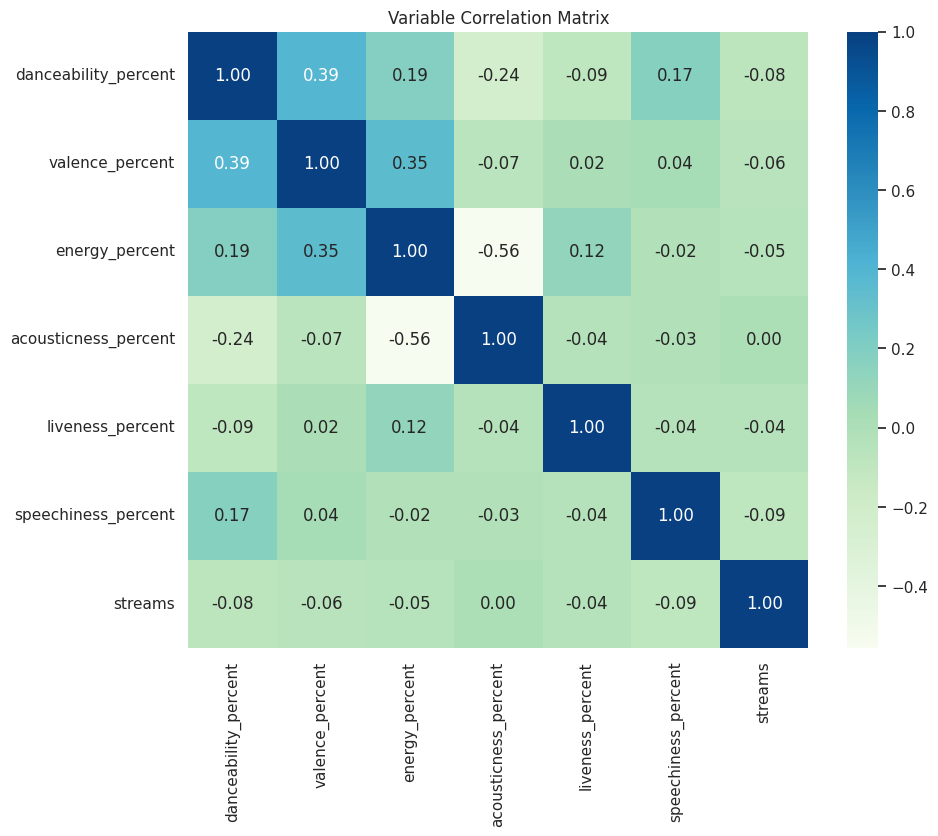

In [ ]:
# Heatmap to show the correlation between all numerical variables
column_list = ['danceability_percent', 'valence_percent', 'energy_percent',
                    'acousticness_percent', 'liveness_percent', 'speechiness_percent', 'streams']
corr_matrix = spotify_df[column_list].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="GnBu")
plt.title('Variable Correlation Matrix')
plt.show()


**Data Analysis**

In [ ]:
import scipy.stats as stats


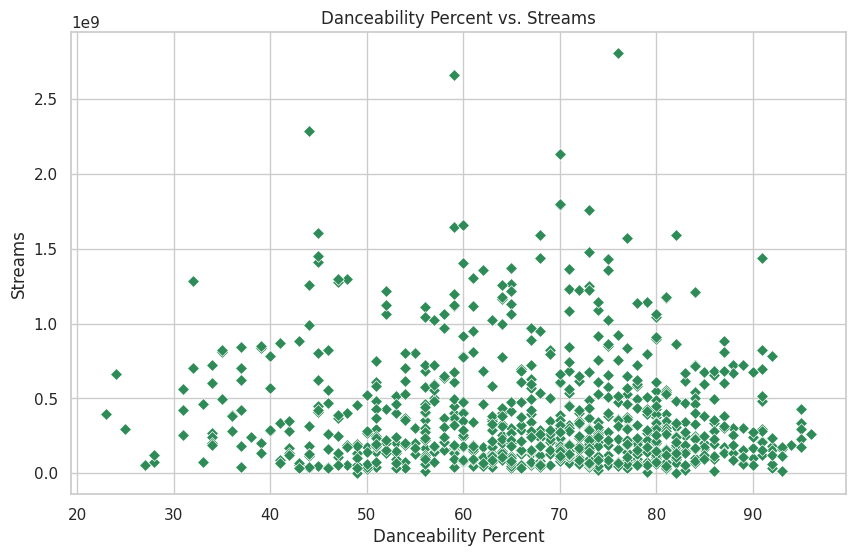

Pearson Result:
PearsonRResult(statistic=-0.07612089535580896, pvalue=0.02879630224637427)


In [ ]:
#Hypothesis 1

# Pearson correlation coefficient
danceability_streams_correlation = stats.pearsonr(spotify_df['danceability_percent'], spotify_df['streams'])

# Scater Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability_percent', y='streams', data=spotify_df,color='seagreen', marker='D')
plt.title('Danceability Percent vs. Streams')
plt.xlabel('Danceability Percent')
plt.ylabel('Streams')
plt.show()

print("\033[1mPearson Result:\033[0m")
print(danceability_streams_correlation)

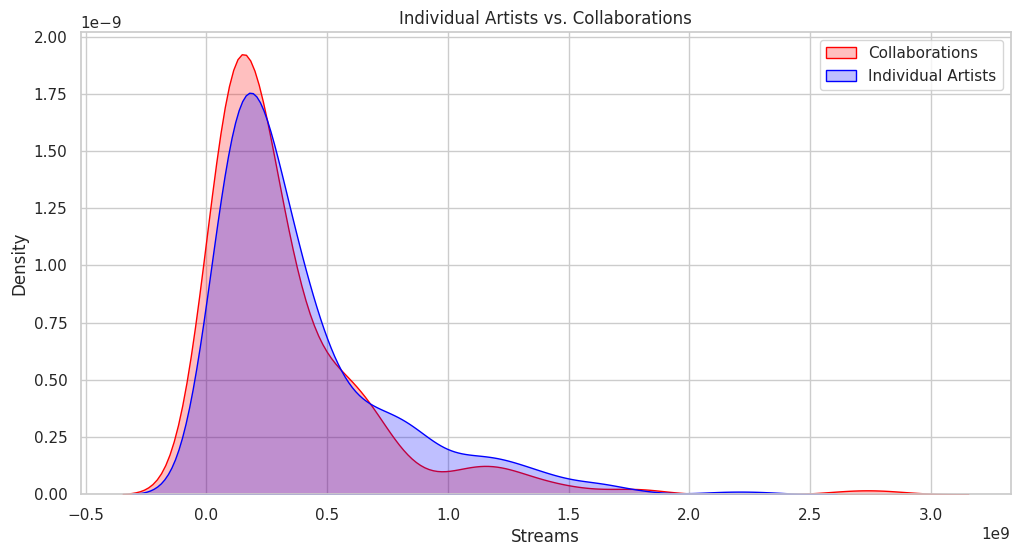

Two-Sample T-Test:
TtestResult(statistic=2.3151660032937524, pvalue=0.02088752734976696, df=711.3850696998385)


In [ ]:
# Hypothesis 2

individual_artist_streams = spotify_df[spotify_df['artist_count'] == 1]['streams']
collaborative_streams = spotify_df[spotify_df['artist_count'] > 1]['streams']

#Two-sample t-test
t_test_results = stats.ttest_ind(individual_artist_streams, collaborative_streams, equal_var=False)

#visualization
plt.figure(figsize=(12, 6))

sns.kdeplot(collaborative_streams, label='Collaborations', color = "red", fill=True)
sns.kdeplot(individual_artist_streams, label='Individual Artists', color =  "blue", fill=True)

plt.title('Individual Artists vs. Collaborations')
plt.xlabel('Streams')
plt.ylabel('Density')
plt.legend()
plt.show()

print("\033[1mTwo-Sample T-Test:\033[0m")
print( t_test_results)


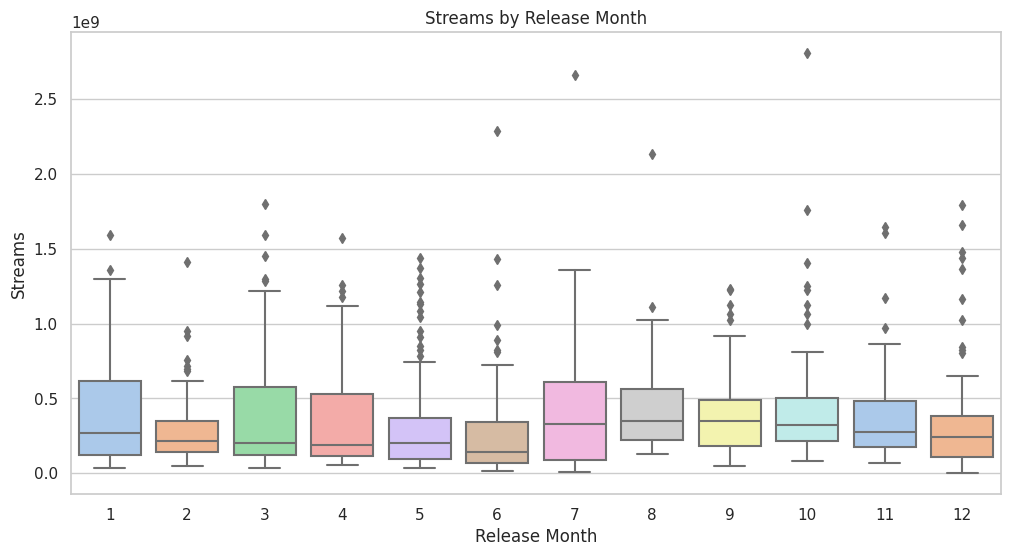

Anova Model:
                         sum_sq     df         F   PR(>F)
C(released_month)  2.308327e+18   11.0  1.540614  0.11193
Residual           1.107392e+20  813.0       NaN      NaN


In [ ]:
#Hypothesis 3
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

# ANOVA
data_model = ols('streams ~ C(released_month)', data=spotify_df).fit()
model_result = anova_lm(data_model, typ=2)

# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='released_month', y='streams', data=spotify_df, palette="pastel")
plt.title('Streams by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Streams')
plt.show()

print("\033[1mAnova Model:\033[0m")
print(model_result)


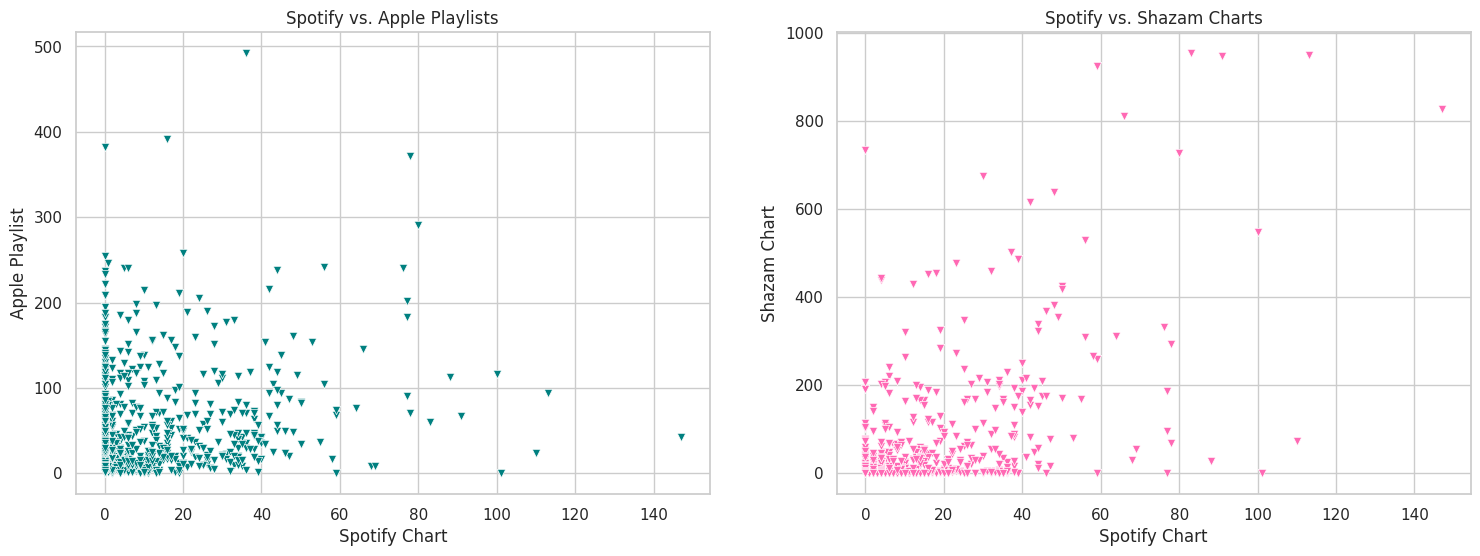

spotify vs. apple:
PearsonRResult(statistic=0.21850129388259357, pvalue=2.2495725624757258e-10)
spotify vs. shazam:
PearsonRResult(statistic=0.5987788926171784, pvalue=2.076138378843316e-81)


In [ ]:
# Hypothesis 4
# Pearson correlation

spotify_vs_apple = stats.pearsonr(spotify_df['in_spotify_charts'], spotify_df['in_apple_playlists'])
spotify_vs_shazam = stats.pearsonr(spotify_df['in_spotify_charts'], spotify_df['in_shazam_charts'])

# Visualization
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(ax=axs[0], x='in_spotify_charts', y='in_apple_playlists', data=spotify_df, color='teal', marker ='v' )
axs[0].set_title('Spotify vs. Apple Playlists')
axs[0].set_xlabel('Spotify Chart')
axs[0].set_ylabel('Apple Playlist')

sns.scatterplot(ax=axs[1], x='in_spotify_charts', y='in_shazam_charts', data=spotify_df, color='hotpink', marker = 'v')
axs[1].set_title('Spotify vs. Shazam Charts')
axs[1].set_xlabel('Spotify Chart')
axs[1].set_ylabel('Shazam Chart')

plt.show()

print("\033[1mspotify vs. apple:\033[0m")
print(spotify_vs_apple )
print("\033[1mspotify vs. shazam:\033[0m")
print(spotify_vs_shazam)


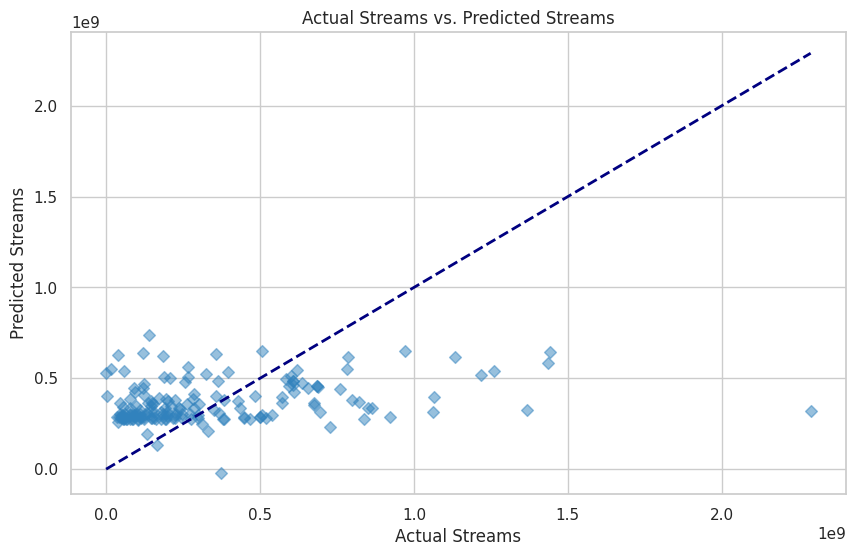

r squared:
0.08374982203652692
mean square error:
1.0912431019314238e+17


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data prep for regression
predictor_list = ['in_spotify_charts', 'in_apple_charts', 'in_shazam_charts']
target_variable = 'streams'

# Drop NaN in predictor list or target variable
reg_prep = spotify_df.dropna(subset=predictor_list + [target_variable])

# Splitting data, model creation, and model training
X_train, X_test, y_train, y_test = train_test_split(reg_prep[predictor_list], reg_prep[target_variable], test_size=0.2, random_state=42)
reg_model = LinearRegression()

reg_model.fit(X_train, y_train)

#Stream prediction
stream_pred = reg_model.predict(X_test)

# Evaluate the model's performance
r_squared_val = r2_score(y_test, stream_pred)
mean_square_err = mean_squared_error(y_test, stream_pred)

# visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, stream_pred, alpha=0.5, color='#3182bd', marker='D')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='navy', lw=2, linestyle='dashed')
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Actual Streams vs. Predicted Streams')
plt.show()

(r_squared_val, mean_square_err)

print("\033[1mr squared:\033[0m")
print(r_squared_val)

print("\033[1mmean square error:\033[0m")
print(mean_square_err)